In [22]:
# Beyond Bitswap Test Bed
# Be able to create a yaml file custom.

IntSlider(value=4, description='# nodes', layout=Layout(grid_area='widget006'), max=300, min=2)


In [1]:
import ui
l = ui.Layout()
l.show()
#display(l.testcase, l.input_data, l.file_size, l.files_directory, l.run_count, \
#    l.n_nodes, l.n_leechers, l.n_passive, l.max_peer_connections, l.churn_rate)


GridspecLayout(children=(Text(value='', description='Testcase', layout=Layout(grid_area='widget001')), Text(va…

In [19]:
# Building config and running testcase
import utils
#testid = utils.runner(utils.process_yaml_config("./config.yaml"))
testid = utils.runner(utils.process_layout_config(l))

Running as:  testground run single --plan=beyond-bitswap --builder=exec:go --runner=local:exec --build-cfg skip_runtime_image=true --testcase=ipfs-transfer --instances=8 -tp input_data=random -tp file_size=15728640,31457280,47185920,57671680 -tp leech_count=3 -tp passive_count=0 -tp max_connection_rate=100 -tp run_count=2 -tp bandwidth_mb=100 -tp latency_ms=10 -tp jitter_pct=5
Run completed successfully with testID: 460ad511dff9


In [ ]:
# Run from config file
import ui
l = ui.ConfigLayout()
l.show()


In [20]:
# Collecting the data.
utils.collect_data(l, testid)

Cleaning previous runs..

Aug 31 08:16:22.601656	INFO	using home directory: /home/adlrocha/testground
Aug 31 08:16:22.601688	INFO	no .env.toml found at /home/adlrocha/testground/.env.toml; running with defaults
Aug 31 08:16:22.601694	INFO	testground client initialized	{"addr": "http://localhost:8042"}

>>> Result:

Aug 31 08:16:22.622709	INFO	created file: 460ad511dff9.tgz

460ad511dff9/.
460ad511dff9/single
460ad511dff9/single/0
460ad511dff9/single/0/diagnostics.out
460ad511dff9/single/0/results.out
460ad511dff9/single/0/run.err
460ad511dff9/single/0/run.out
460ad511dff9/single/1
460ad511dff9/single/1/diagnostics.out
460ad511dff9/single/1/results.out
460ad511dff9/single/1/run.err
460ad511dff9/single/1/run.out
460ad511dff9/single/2
460ad511dff9/single/2/diagnostics.out
460ad511dff9/single/2/results.out
460ad511dff9/single/2/run.err
460ad511dff9/single/2/run.out
460ad511dff9/single/3
460ad511dff9/single/3/diagnostics.out
460ad511dff9/single/3/results.out
460ad511dff9/single/3/run.err
46

In [9]:
import process
agg, testcases = process.aggregate_results()
byLatency = process.groupBy(agg, "latencyMS")
byNodeType = process.groupBy(agg, "nodeType")
byFileSize = process.groupBy(agg, "fileSize")
byBandwidth = process.groupBy(agg, "bandwidthMB")
byTopology = process.groupBy(agg, "topology")

./results/2d231e839f22/single/4/results.out
./results/2d231e839f22/single/0/results.out
./results/2d231e839f22/single/7/results.out
./results/2d231e839f22/single/2/results.out
./results/2d231e839f22/single/5/results.out
./results/2d231e839f22/single/6/results.out
./results/2d231e839f22/single/1/results.out
./results/2d231e839f22/single/3/results.out


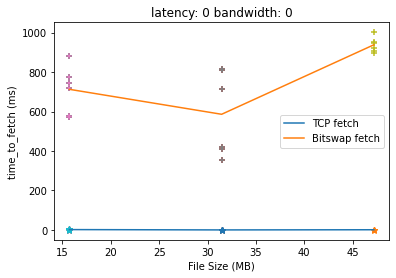

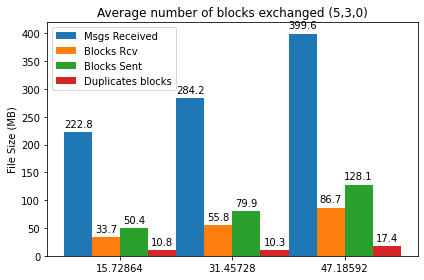

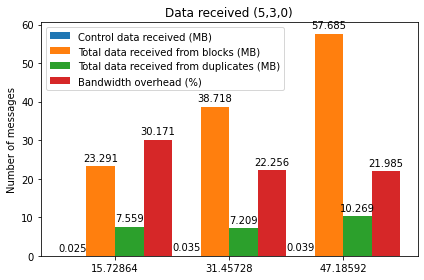

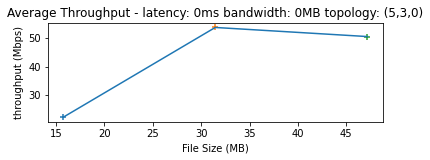

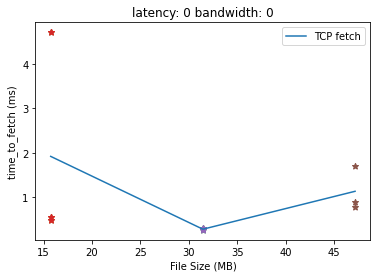

In [10]:
process.plot_latency(byLatency, byBandwidth, byFileSize)
process.plot_messages(byFileSize, byTopology)
process.plot_bw_overhead(byFileSize, byTopology)
process.plot_througput(byLatency, byBandwidth, byFileSize, byTopology, testcases)
process.plot_tcp_latency(byLatency, byBandwidth, byFileSize)
